In [0]:
# %matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

import torchvision
import torchvision.transforms as transforms
from matplotlib import cm

from torch.nn import Conv2d, AvgPool2d, BatchNorm2d, BatchNorm1d
import torch.nn.functional as F
from torchsummary import summary


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [0]:
import os
print(os.getcwd())

/content


Part 1.1 - plot of sigmoid function

In [0]:
# x = 1.0
# w = np.arange(-2.0, 2.0, 0.1)
# b = np.arange(-2.0, 2.0, 0.1)
# W_n, B_n = np.meshgrid(w, b)
# sig = 1.0 / (1.0 + np.exp(-(W_n*x + B_n)))

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(W_n, B_n, sig)

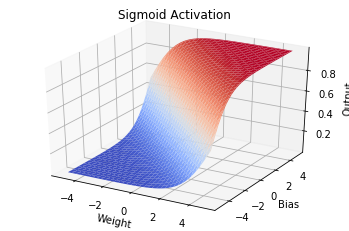

In [0]:
w = torch.arange(-5.0, 5.1, 0.1)
b = torch.arange(-5.0, 5.1, 0.1)

W, B = torch.meshgrid([w, b])
W, B = W.t(), B.t()
W.requires_grad = True
B.requires_grad = True

x = torch.ones(B.shape)

Z = W*x + B
sig = torch.sigmoid(Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    W.detach().numpy(),
    B.detach().numpy(),
    sig.detach().numpy(), cmap=cm.coolwarm)

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Output")
plt.title("Sigmoid Activation")

plt.savefig("Sigmoid.png", dpi=600)
files.download("Sigmoid.png") 

Part 1.2 - L2 Loss

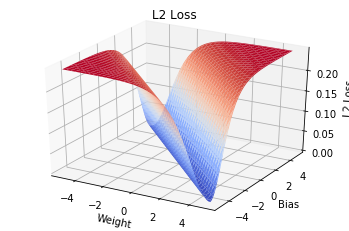

In [0]:
y = torch.tensor(0.5).repeat(W.shape)
l2_loss = torch.pow((y - sig), 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    W.detach().numpy(),
    B.detach().numpy(),
    l2_loss.detach().numpy(),
    cmap=cm.coolwarm)

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("L2 Loss")
plt.title("L2 Loss")

plt.savefig("L2.png", dpi=600)
files.download("L2.png") 

Part 1.3 - L2 Loss gradient

In [0]:
avg_loss = l2_loss.sum()
avg_loss.backward()

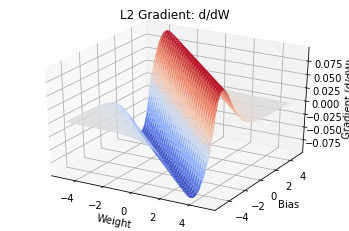

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W.detach().numpy(),
                B.detach().numpy(),
                W.grad.numpy(),
                cmap=cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Gradient (d/dW)")
plt.title("L2 Gradient: d/dW")

plt.savefig("L2Grad.png", dpi=600)
files.download("L2Grad.png") 

In [0]:
# s = sig.clone().detach()
# l2 = l2_loss.clone().detach()
# man_comp = l2 * (s * (1-s))

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(W.detach().numpy(),
#                 B.detach().numpy(),
#                 man_comp.numpy(),
#                 cmap=cm.coolwarm)
# ax.set_xlabel("Weight")
# ax.set_ylabel("Bias")
# ax.set_zlabel("Gradient")

# Pretty much what you get with auto-grad computation if you take torch.abs of the gradients


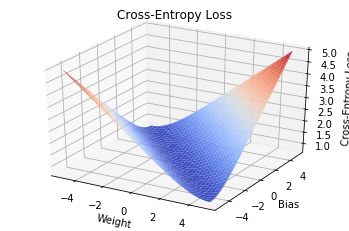

In [0]:
w = torch.arange(-5.0, 5.1, 0.1)
b = torch.arange(-5.0, 5.1, 0.1)

W, B = torch.meshgrid([w, b])
W, B = W.t(), B.t()
W.requires_grad = True
B.requires_grad = True

x = torch.ones(B.shape)

Z = W*x + B
sig = torch.sigmoid(Z)

y = torch.tensor(0.5).repeat(W.shape)
ce_loss = -1 * ((y * torch.log(sig)) + (1-y) * (torch.log(1-sig)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    W.detach().numpy(),
    B.detach().numpy(),
    ce_loss.detach().numpy(),
    cmap=cm.coolwarm)

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss")

plt.savefig("CELoss.png", dpi=600)
files.download("CELoss.png") 


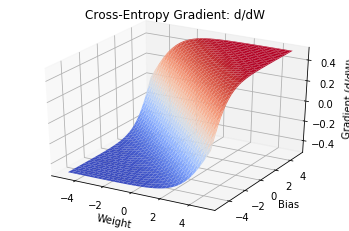

In [0]:
avg_loss = ce_loss.sum()
avg_loss.backward()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W.detach().numpy(),
                B.detach().numpy(),
                W.grad.numpy(),
                cmap=cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Gradient (d/dW)")
plt.title("Cross-Entropy Gradient: d/dW")

plt.savefig("CEGrad.png", dpi=600)
files.download("CEGrad.png") 


Part 1.6

1) L2 loss is the squared difference between the predicted output and the true output. Cross entropy loss measures the scaled log innacuracy of the predicted output by the true output. 

2) The gradient of L2 goes to 0 for wildly inaccurate predictions (regions with high loss). Likewise, the magnitude of the gradient of cross-entropy increases as the loss increases. Both gradients are predictably zero when the loss is zero.

3) L2 loss will be highly inefficient for classification tasks, as the gradient for incorrect predictions may be close to zero. Likewise, cross-entropy loss has the desired behavior for classification tasks - large gradients for incorrect predictions, near zero gradient for correct predictions. Cross-entropy is clearly ill-conditioned for regression tasks where the target is often any real number, not a classification label.

Part 2 - Solving XOR with a 2-layer Perceptron

In [0]:
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]], requires_grad=True)
y = torch.tensor([[0], [1], [1], [0]], requires_grad=False).type(torch.FloatTensor)

In [0]:
class Net(torch.nn.Module):
  def __init__(self):
      super(Net, self).__init__()
      self.hidden = torch.nn.Linear(X.shape[1], 2)
      self.out = torch.nn.Linear(2, 1)

  def forward(self, x):
      x = torch.tanh(self.hidden(x))
      x = torch.sigmoid(self.out(x))
      return x

In [0]:
net = Net()

criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

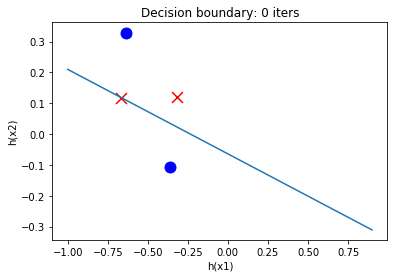

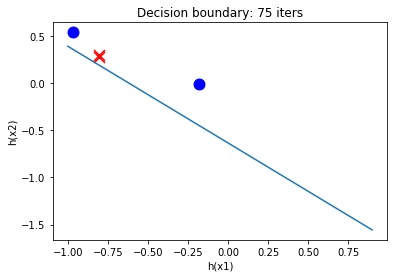

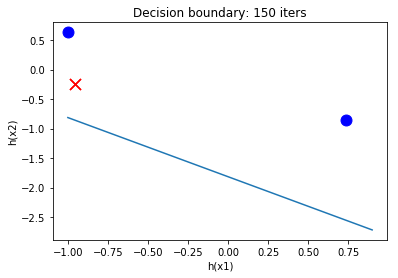

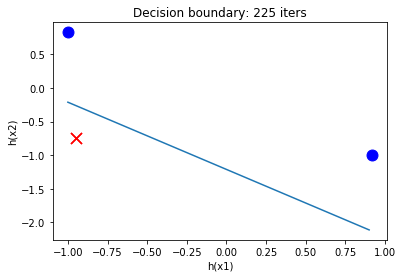

In [0]:
running_loss = 0.0
accuracies = np.zeros(100)
torch.manual_seed(7)

for epoch in range(250):  # loop over the dataset multiple times
           
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 75 == 0:
      accuracies[epoch//75] == (outputs.round() == y).sum().item() / y.shape[0]
      
      h = net.hidden.weight.data.numpy()
      b = net.hidden.bias.data.numpy()
      
      # The gist is get the decision boundary from the weights vector
      # Weights vector defined as line between two weights points
      # Decision boundary orthogonal to weight vector
     
      mid_x = (h[1,0] + h[0,0])/2
      mid_y = ((h[1,1] + h[0,1]))/2
      
      p1 = (mid_x, mid_y)
      p2 = (mid_x - h[1,1] + h[0,1], mid_y + h[1,0] - h[0, 0])
      
      m = (p2[1] - p1[1]) / (p2[0] - p1[0])
      c = (p2[1] - (m * p2[0]))
      
      h_x_axis = np.arange(0, 1., .1)
      
      x_axis = np.arange(-1, 1, 0.1)
      y_axis = m * x_axis + c

      one_ind = [1, 2]
      zero_ind = [0, 3]
      mapped = np.tanh(X.detach().numpy() @ h.T + b)
      
      fig = plt.figure()
      plt.scatter(mapped[one_ind, 0], mapped[one_ind, 1], marker='x', c='r', s=120)
      plt.scatter(mapped[zero_ind, 0], mapped[zero_ind, 1], marker='o', c='b', s=120)
      plt.plot(x_axis, y_axis)
        
      plt.title("Decision boundary: {} iters".format(epoch))
      plt.xlabel("h(x1)")
      plt.ylabel("h(x2)")
  
      # UNCOMMENT TO SAVE IMAGES TO FILE
#       plt.savefig("decision_{}.png".format(epoch), dpi=600)
#       files.download("decision_{}.png".format(epoch)) 
      

Part 3 - Train a CNN

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)


0it [00:00, ?it/s]

9920512it [00:03, 2771239.70it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 48920.03it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:09, 177747.46it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 18423.70it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


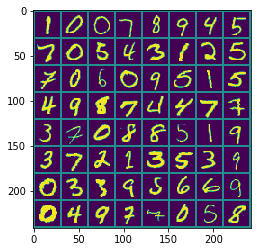

    1     0     0     7     8     9     4     5     7     0


In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg[0], (0, 1)), cmap=cm.viridis)
    plt.show()
    return

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].item() for j in range(10)))

In [0]:
class ConvNet(torch.nn.Module):
  def __init__(self):
      super(ConvNet, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=5//2)
      self.conv1_bn = BatchNorm2d(32)
      self.pool1 = nn.AvgPool2d(2, stride=2, padding=0)
      self.conv2 = nn.Conv2d(32, 32, kernel_size=5, padding=5//2)
      self.conv2_bn = BatchNorm2d(32)
      self.pool2 = nn.AvgPool2d(2, stride=2, padding=0)
      self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=5//2)
      self.conv3_bn = BatchNorm2d(64)
      self.pool3 = nn.AvgPool2d(2, stride=2, padding=0)
      self.fcn1 = nn.Linear(576, 64)
      self.fcn1_bn = BatchNorm1d(64)
      self.fcn2 = nn.Linear(64, 10)

  def forward(self, x):
      x = F.relu(self.conv1_bn(self.conv1(x)))
      x = self.pool1(x)
      x = F.relu(self.conv2_bn(self.conv2(x)))
      x = self.pool2(x)
      x = F.relu(self.conv3_bn(self.conv3(x)))
      x = self.pool3(x)
      x = x.view(x.size(0), -1)
      x = F.relu(self.fcn1_bn(self.fcn1(x)))
      x = self.fcn2(x)
      return F.softmax(x, dim=0)

In [34]:
PATH = os.getcwd() + '/gdrive/My Drive/Colab Notebooks/CIS680/HW1/conv_net.pt'
LOADED_SAVED_MODEL = False

net = ConvNet()

try:
  net.load_state_dict(torch.load(PATH))
  print("Saved model weights loaded")
  LOADED_SAVED_MODEL = True
except:
  print("Saved model not found")

if torch.cuda.is_available():
  net.cuda()

summary(net, (1, 28, 28))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Saved model weights loaded
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
       BatchNorm2d-2           [-1, 32, 28, 28]              64
         AvgPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          25,632
       BatchNorm2d-5           [-1, 32, 14, 14]              64
         AvgPool2d-6             [-1, 32, 7, 7]               0
            Conv2d-7             [-1, 64, 7, 7]          51,264
       BatchNorm2d-8             [-1, 64, 7, 7]             128
         AvgPool2d-9             [-1, 64, 3, 3]               0
           Linear-10                   [-1, 64]          36,928
      BatchNorm1d-11                   [-1, 64]             128
           Linear-12                   [-1, 10]             650
Total params: 115,690
Trainable params: 115,690
Non-trainable params: 0
----

In [35]:
if not LOADED_SAVED_MODEL:
  
  train_accs = []
  test_accs = []
  
  for epoch in range(8):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.cuda()
          labels = labels.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 250 == 249:    # print every 249 mini-batches
            
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 250))
              running_loss = 0.0
              
      train_accs.append(train_accuracy())
      test_accs.append(test_accuracy())
  
  print('Finished Training')  
else:
  print("Using pre-trained model")

Using pre-trained model


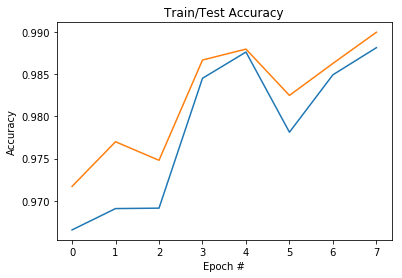

In [0]:
plt.title("Train/Test Accuracy")
plt.plot(range(len(train_accs)), train_accs)
plt.plot(range(len(test_accs)), test_accs)
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.savefig("Train_test.png".format(epoch), dpi=600)
files.download("Train_test.png".format(epoch)) 

In [0]:
def train_accuracy():
  return accuracy(trainloader)

def test_accuracy():
  return accuracy(testloader)

def accuracy(loader):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in loader:
          images, labels = data
          images = images.cuda()
          labels = labels.cuda()
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
 
  return correct / total

NOTE TO GRADER (or whoever):
This was my initial attempt at Part 4. It is not very good. I made a second attempt at Part 4 that is better, but overly complicated for this task. 

See the other file for another writeup of Part 4.

Part 4.1 - Pick and image that we classified correctly

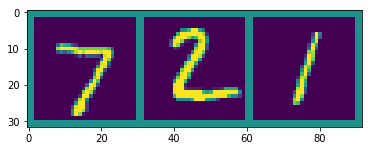

Predicted label: [7 2 1]


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
n_adver = 3

outputs = net(images.cuda())
_, predictions = torch.max(outputs.data, 1)

# Pick out the first two thing we labeled correctly
correct_pred_idx = (predictions == labels.cuda()).nonzero()[:n_adver].reshape(-1)

# Pick out the images and labels
clean_img = images[correct_pred_idx]
clean_label = labels[correct_pred_idx]

imshow(torchvision.utils.make_grid(clean_img.clone().cpu()))

print("Predicted label: {}".format(clean_label.reshape(-1).clone().cpu().numpy()))


In [0]:
def has_some_equal (ind1, ind2):
  return (ind1 == ind2).nonzero().size(0) > 0

def all_conf_greater_90(confidences):
  return np.all(confidences > 0.90)

def stop_criteria(ind1, ind2, confidences):
  """Criteria to stop adverserial training
     Returns: Boolean
        True -> Don't stop
        False -> stop
  """
  if has_some_equal(ind1, ind2):
    return True
  
  return not all_conf_greater_90(confidences)
  

In [0]:
epsilon = 0.3
img_ep = torch.zeros(clean_img.shape, requires_grad=True)
img_pet = (clean_img + img_ep).clone()

adv_pred = clean_label.clone().cuda()
confidences = torch.zeros(adv_pred.shape).cuda()

epoch = 0
while (stop_criteria(adv_pred.cpu(), clean_label, confidences.cpu().detach().numpy()) and epoch < 100):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(img_pet.cuda())
    
    confidences, adv_pred = torch.max(outputs, dim=1)
#     print(confidences)
    loss = criterion(outputs, clean_label.cuda())
    loss.backward()

    # Notice we do not step the optimizer.
    ep_grad = torch.sign(img_ep.grad.data)
    ep_grad[ep_grad < 0.] = 0.
    # If the label has already flipped, don't update the gradient
    ep_grad[(adv_pred.cpu() != clean_label).nonzero()] = 0

    img_ep.data += epsilon * ep_grad
    img_pet.data = clean_img.data + img_ep.data
    
    img_pet.data = torch.clamp(img_pet.data, -1., 1.)

    epoch += 1

    print('[{:d}] loss: {:.3f} | labels: {}'.format(
        epoch + 1,
        loss,
        adv_pred.reshape(-1).cpu().numpy()))

print('Finished Training')
print('--------------------------------')
print("Final labels: {}".format(adv_pred.reshape(-1).cpu().numpy()))
print("Final confidences: {}".format(confidences.reshape(-1).cpu().detach().numpy()))

[2] loss: 1.700 | labels: [7 2 1]
[3] loss: 1.707 | labels: [7 2 1]
[4] loss: 1.958 | labels: [7 8 1]
[5] loss: 2.034 | labels: [7 6 1]
[6] loss: 2.047 | labels: [2 6 1]
[7] loss: 2.106 | labels: [2 6 5]
Finished Training
--------------------------------
Final labels: [2 6 5]
Final confidences: [0.9998503 0.9981244 0.977775 ]


In [0]:
changed = torch.eq(clean_label, adv_pred.cpu())
changed = torch.eq(changed, 0)
print(changed)
#             

tensor([1, 1, 1], dtype=torch.uint8)


Original Images


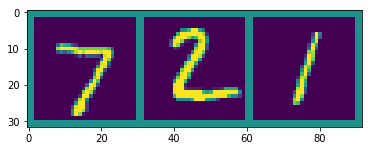

Perturbed Images


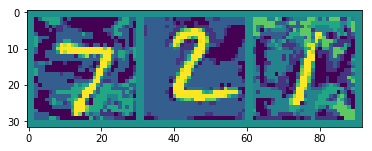

Original labels: [7 2 1]
Adverserial labels: [7 2 6]
Perturbed image is strictly greater than original image.


In [0]:

print("Original Images")
imshow(torchvision.utils.make_grid(clean_img.clone().cpu()))
# plt.savefig("original_images.png".format(epoch), dpi=600)
# files.download("original_images.png".format(epoch)) 
print("Perturbed Images")
imshow(torchvision.utils.make_grid(img_pet.detach().cpu()))


print("Original labels: {}".format(clean_label.reshape(-1).clone().cpu().numpy()))
print("Adverserial labels: {}".format(indices.reshape(-1).clone().cpu().numpy()))

residual = (img_pet.detach() >= clean_img).clone()
assert(residual.numel() - residual.nonzero().size(0) == 0)
print("Perturbed image is strictly greater than original image.")

Part 4.2 - Loss function doesn't change, just change the labels

In [0]:
def has_some_unequal (ind1, ind2):
  return (ind1 != ind2).nonzero().size(0) > 0

def all_conf_greater_90(confidences):
  return np.all(confidences > 0.90)

def adver_txn_stop_criteria(ind1, ind2, confidences):
  """Criteria to stop adverserial training
     Returns: Boolean
        True -> Don't stop
        False -> stop
  """
  if has_some_unequal(ind1, ind2):
    return True
  return not all_conf_greater_90(confidences)
  

In [0]:
TARGET_NUMERAL = 9

epsilon = 0.3

img_ep = torch.zeros(clean_img.shape, requires_grad=True)
img_pet = (clean_img + img_ep).clone()

indices = clean_label.clone().cuda()
target_label = torch.ones(
    indices.shape,
    dtype=torch.int64,
    requires_grad=False) * TARGET_NUMERAL

confidences = torch.zeros(indices.shape).cuda()

epoch = 0

# adver_txn_stop_criteria(indices.cpu(), target_label, confidences.cpu().detach().numpy()) and 
while (epoch < 10):

    # zero the parameter gradients
    optimizer.zero_grad()

    outputs = net(img_pet.cuda())
    _, out_labels = torch.max(outputs.clone().detach(), dim=1)

    # this one tests the zero mask idea
#     outputs.data[torch.arange(0,10).repeat(3, 1) != TARGET_NUMERAL] = 1.
#     outputs.data[:, TARGET_NUMERAL] = 1 - outputs.data[:, TARGET_NUMERAL]
    
    #     print(outputs.data)
#     print(outputs)
#     print(outputs)
    confidences, indices = torch.max(outputs, dim=1)
    loss = -1 * criterion(outputs, target_label.cuda())
    loss.backward()

    # Notice we do not step the optimizer.
    ep_grad = torch.sign(img_ep.grad.data)
    ep_grad[ep_grad < 0.] = 0.
    # If the label has already flipped, don't update the gradient
#     ep_grad[(indices.cpu() == target_label).nonzero()] = 0.


    img_ep.data += epsilon * ep_grad
    img_pet.data = clean_img.data + img_ep.data
    img_pet.data = torch.clamp(img_pet.data, -1., 1.)

    epoch += 1

    print('[{:d}] loss: {:.3f} | labels: {}'.format(
        epoch + 1,
        loss,
        out_labels.reshape(-1).cpu().numpy()))

print('Finished Training')
print('--------------------------------')
print("Final labels: {}".format(out_labels.reshape(-1).cpu().numpy()))
print("Final confidences: {}".format(confidences.reshape(-1).cpu().detach().numpy()))

[2] loss: -2.366 | labels: [7 2 1]
[3] loss: -2.395 | labels: [7 2 4]
[4] loss: -2.384 | labels: [7 2 4]
[5] loss: -2.380 | labels: [7 2 6]
[6] loss: -2.380 | labels: [7 2 6]
[7] loss: -2.374 | labels: [7 2 6]
[8] loss: -2.373 | labels: [7 2 6]
[9] loss: -2.371 | labels: [7 2 6]
[10] loss: -2.368 | labels: [7 2 6]
[11] loss: -2.365 | labels: [7 2 6]
Finished Training
--------------------------------
Final labels: [7 2 6]
Final confidences: [0.96959686 0.9999455  0.99943835]


Original Images


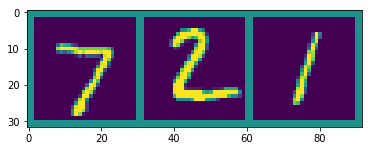

Perturbed Images


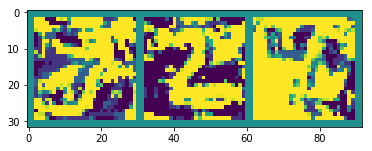

Original labels: [7 2 1]
Adverserial labels: [7 2 6]
Perturbed image is strictly greater than original image.


In [0]:
print("Original Images")
imshow(torchvision.utils.make_grid(clean_img.clone().cpu()))
print("Perturbed Images")
imshow(torchvision.utils.make_grid(img_pet.detach().cpu()))


print("Original labels: {}".format(clean_label.reshape(-1).clone().cpu().numpy()))
print("Adverserial labels: {}".format(indices.reshape(-1).clone().cpu().numpy()))

residual = (img_pet.detach() >= clean_img).clone()
assert(residual.numel() - residual.nonzero().size(0) == 0)
print("Perturbed image is strictly greater than original image.")

